# Trabajo Práctico 7 - Punto 2

# Analitico
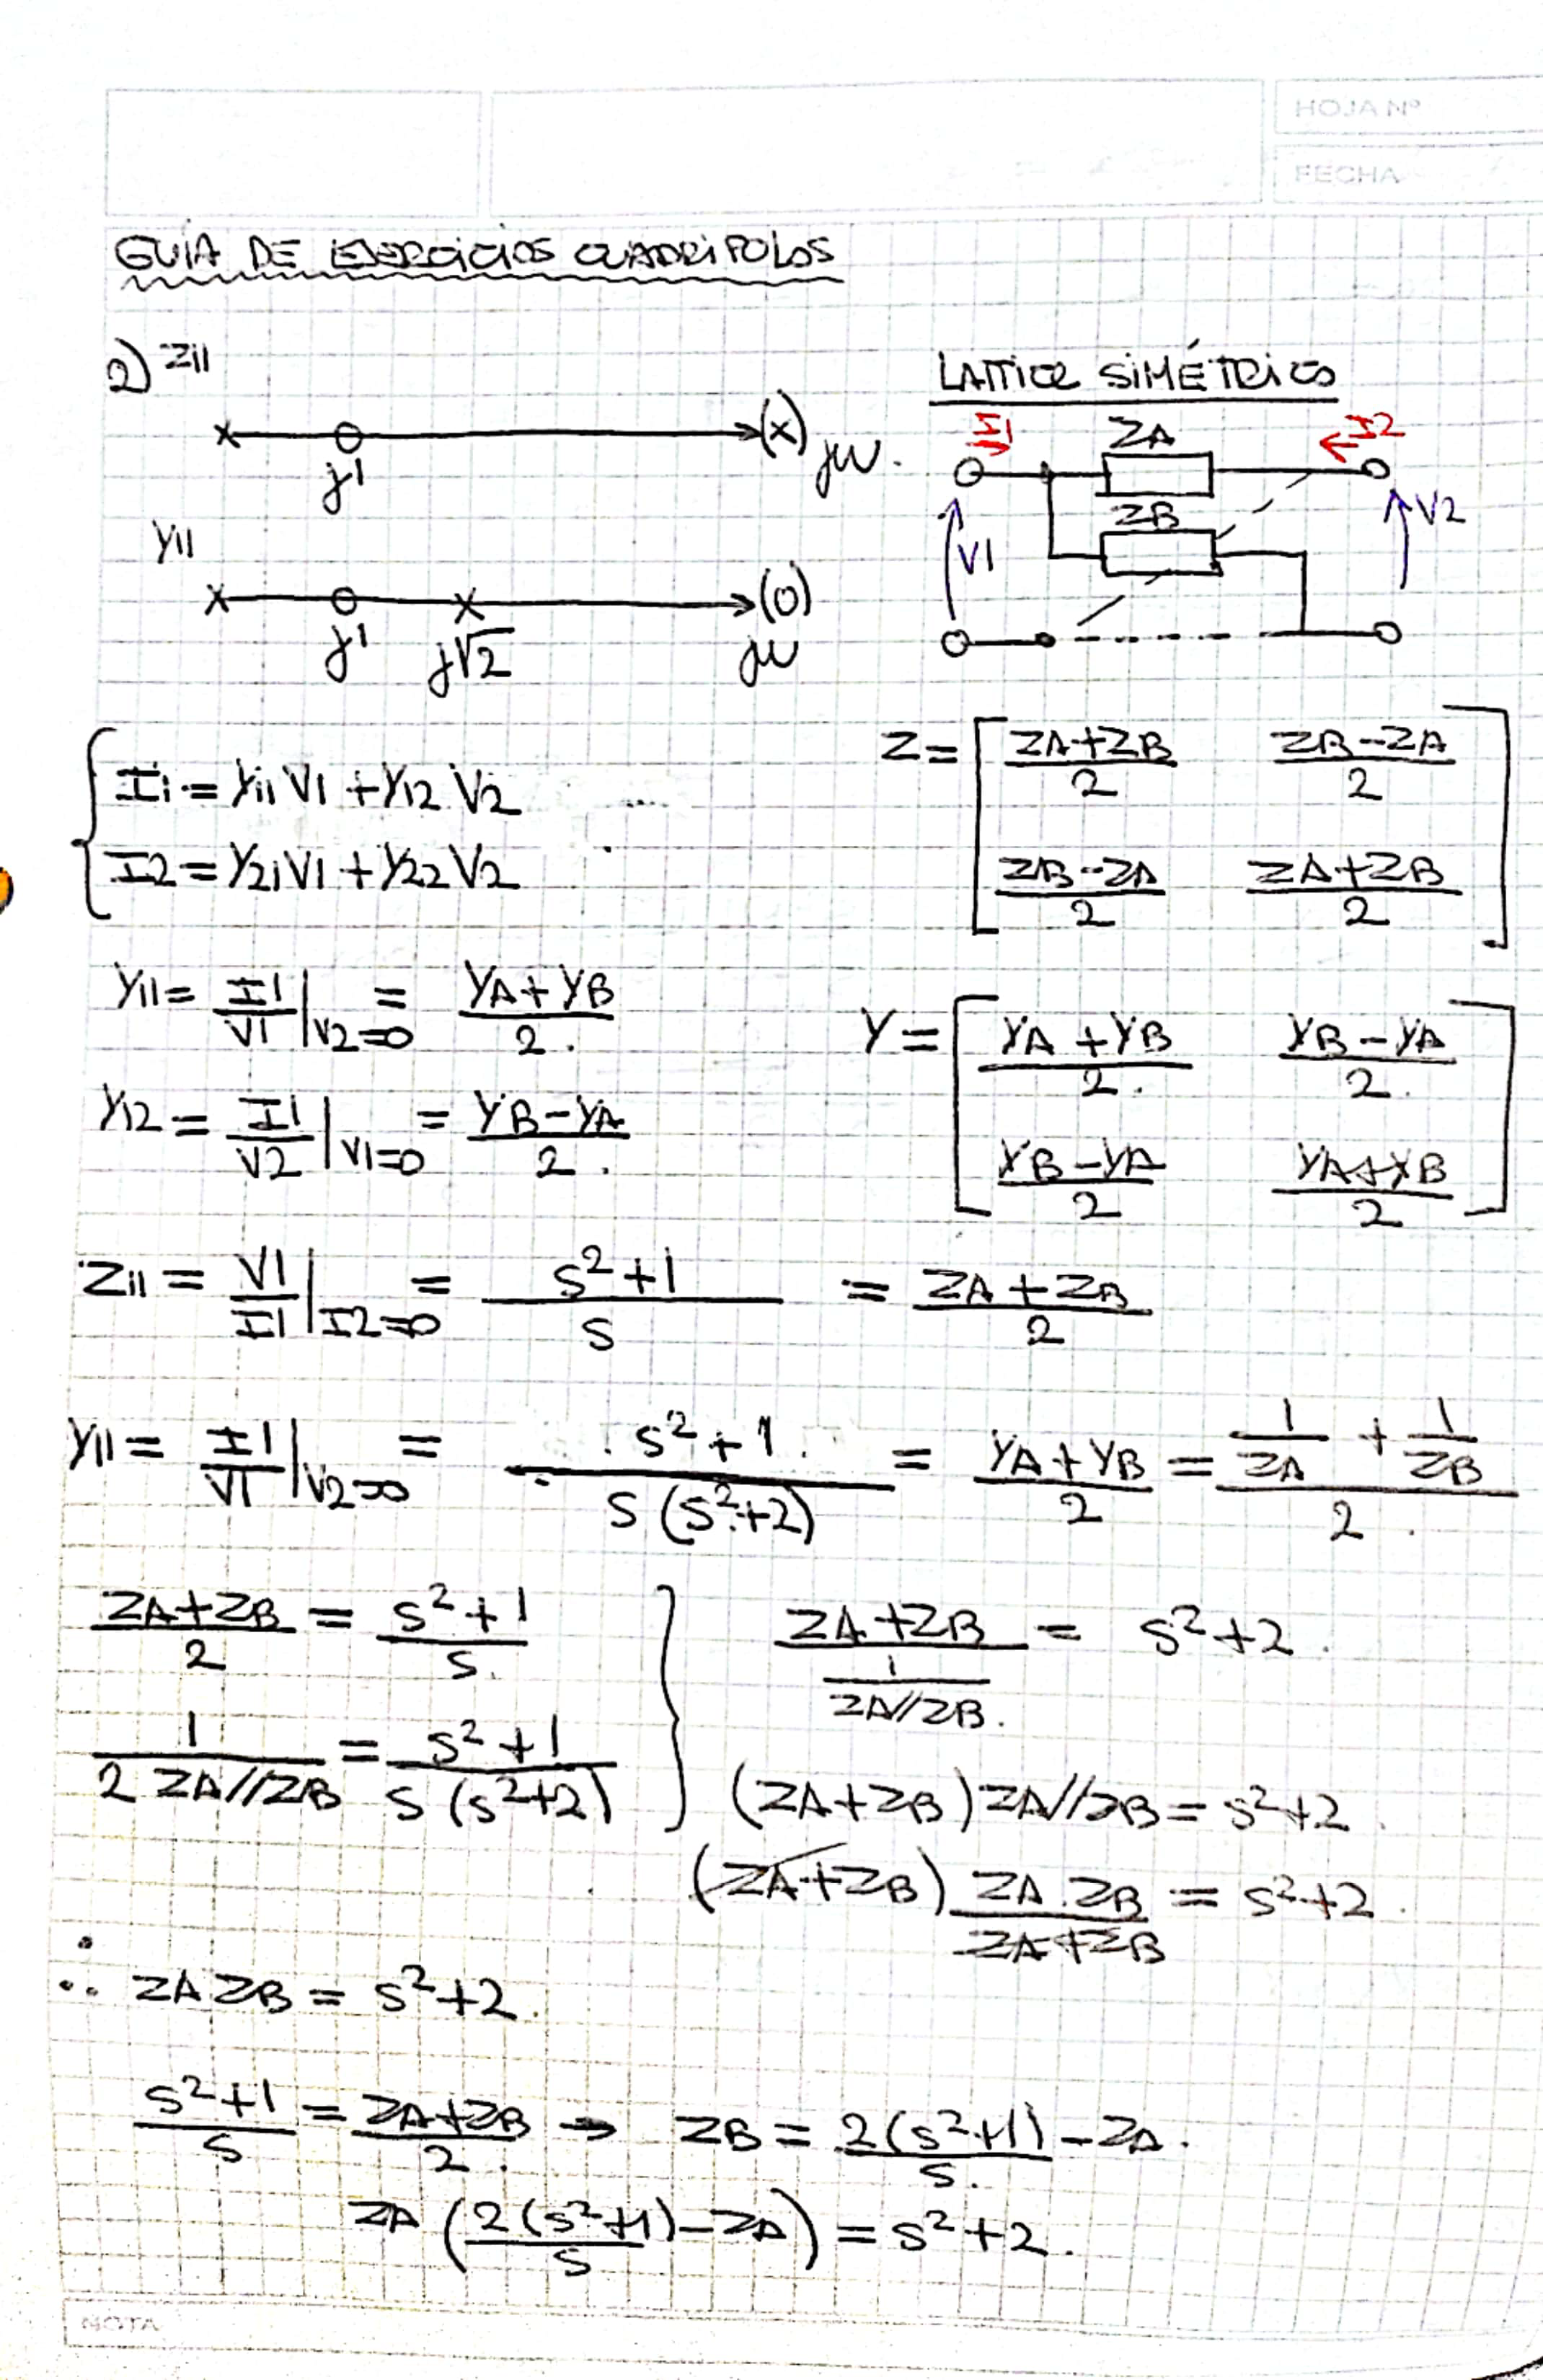
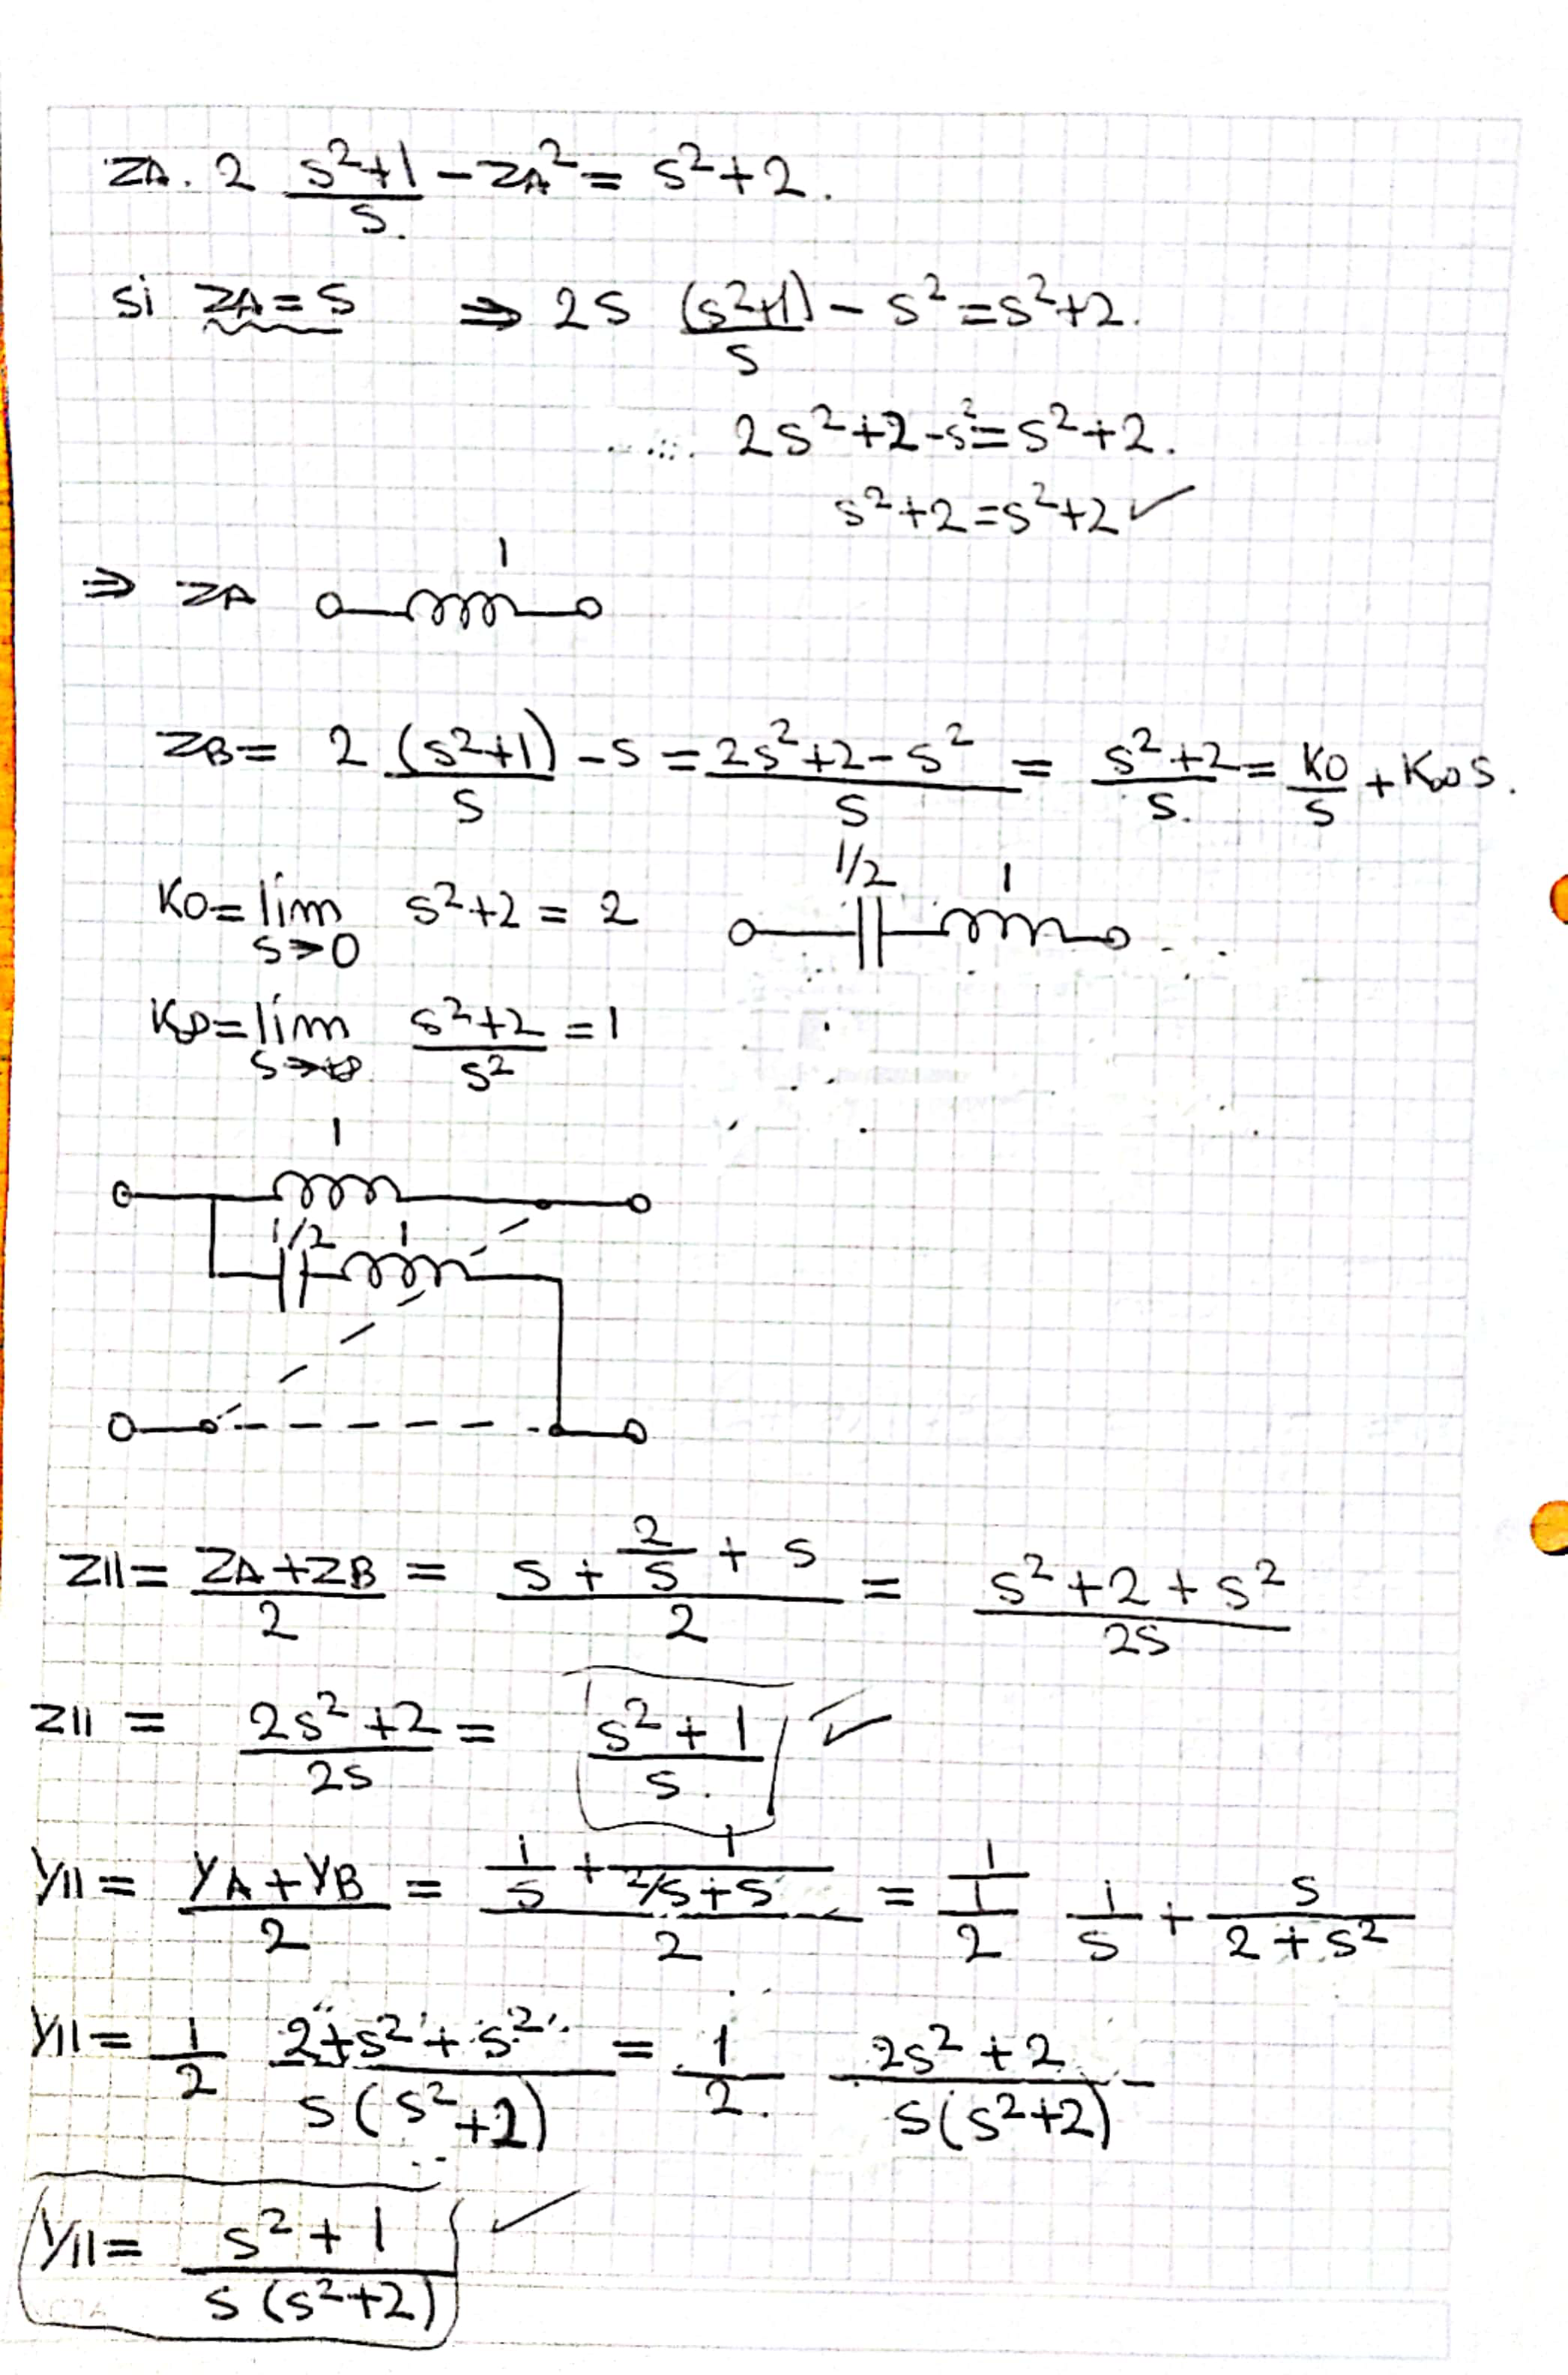


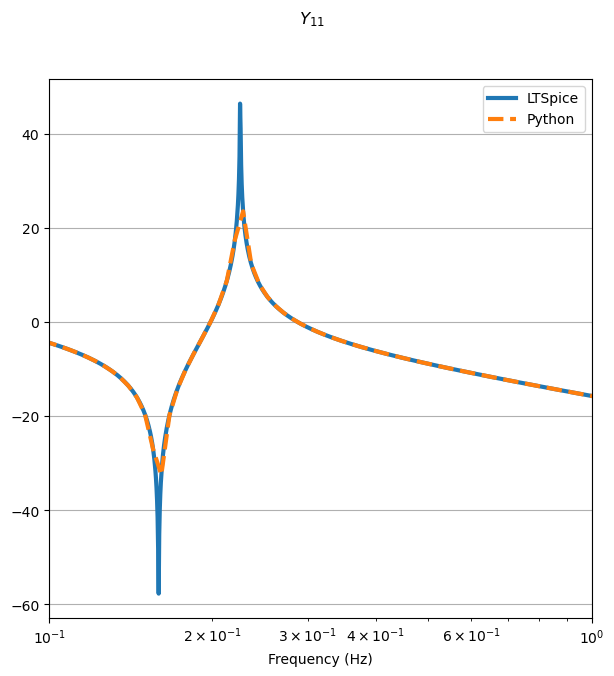

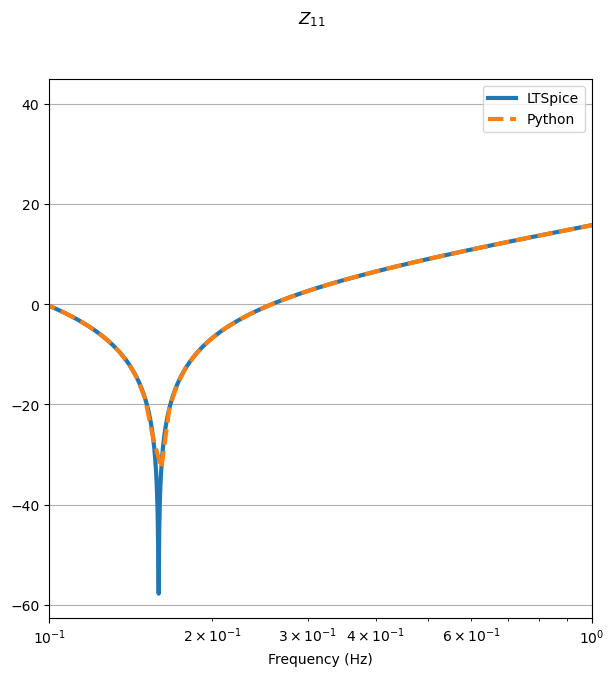

In [11]:
import ltspice

import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig


#%% Punto 1
l = ltspice.Ltspice('Punto 2.raw')
l.parse()


freq = l.get_frequency()
Y11 =l.get_data('Y11(V1)')
Z11 =l.get_data('Z11(V1)')


plt.close('all')
fig1, ax1 = plt.subplots(1, 1, figsize=(7,7))
fig1.suptitle(r'$Y_{11}$')
fig2, ax2 = plt.subplots(1, 1, figsize=(7,7))
fig2.suptitle(r'$Z_{11}$')
ax1.semilogx(freq, 20 * np.log10(np.abs(Y11)), label='LTSpice',linewidth=3)
ax2.semilogx(freq, 20 * np.log10(np.abs(Z11)), label='LTSpice',linewidth=3)


ax1.grid()
ax2.grid()
ax1.set_xlabel("Frequency (Hz)")
ax2.set_xlabel("Frequency (Hz)")


num_Y11 = np.array([1,0,1])
den_Y11 = np.array([1,0,2,0])

num_Z11 = np.array([1,0,1])
den_Z11 = np.array([0,1,0])

w,H_Y11 = sig.freqs(num_Y11,den_Y11)
w,H_Z11 = sig.freqs(num_Z11,den_Z11)

ax1.semilogx(w/(2*np.pi),20*np.log10(np.abs(H_Y11)),label='Python',ls='--',linewidth=3)
ax2.semilogx(w/(2*np.pi),20*np.log10(np.abs(H_Z11)),label='Python',ls='--',linewidth=3)
ax1.set_xlim([10e-2,10e-1])
ax2.set_xlim([10e-2,10e-1])
ax1.legend()
ax2.legend()
plt.show()

#### Se observa que la curva analítica y la simulada con LTspice coinciden, por lo que se verifica correctamente que el circuito calculado cumple con las funciones de excitacion solicitada.